In [29]:
import matplotlib.pyplot as plt
import pandas as pd
#데이터 저장 위치
data_home = 'https://github.com/dknife/ML/raw/main/data/'
lin_data = pd.read_csv(data_home+'pollution.csv')
print(lin_data)

       input  pollution
0   0.240557   4.858750
1   0.159731   4.471091
2   0.108295   4.341897
3   0.233770   3.586844
4   0.283235   3.678243
..       ...        ...
95  0.070824   4.851617
96  0.055300   4.912696
97  0.138229   5.516441
98  0.007205   5.661260
99  0.290294   3.169049

[100 rows x 2 columns]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='input', ylabel='pollution'>

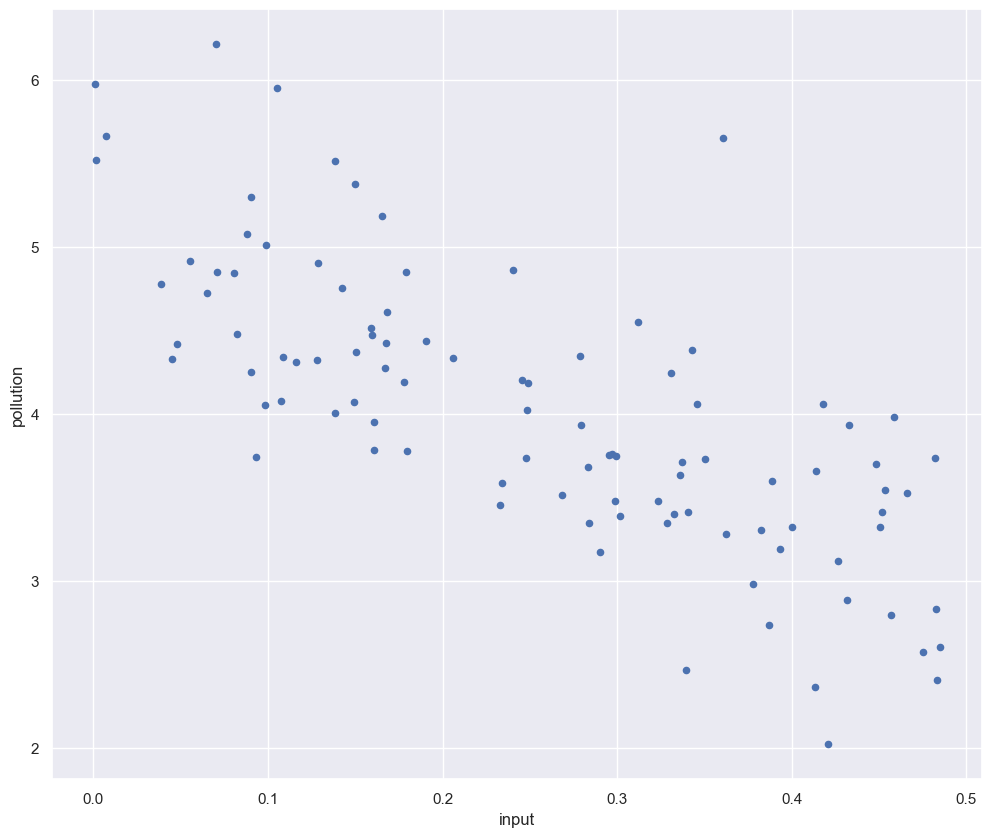

In [30]:
lin_data.plot(kind = 'scatter', x= 'input', y= 'pollution')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


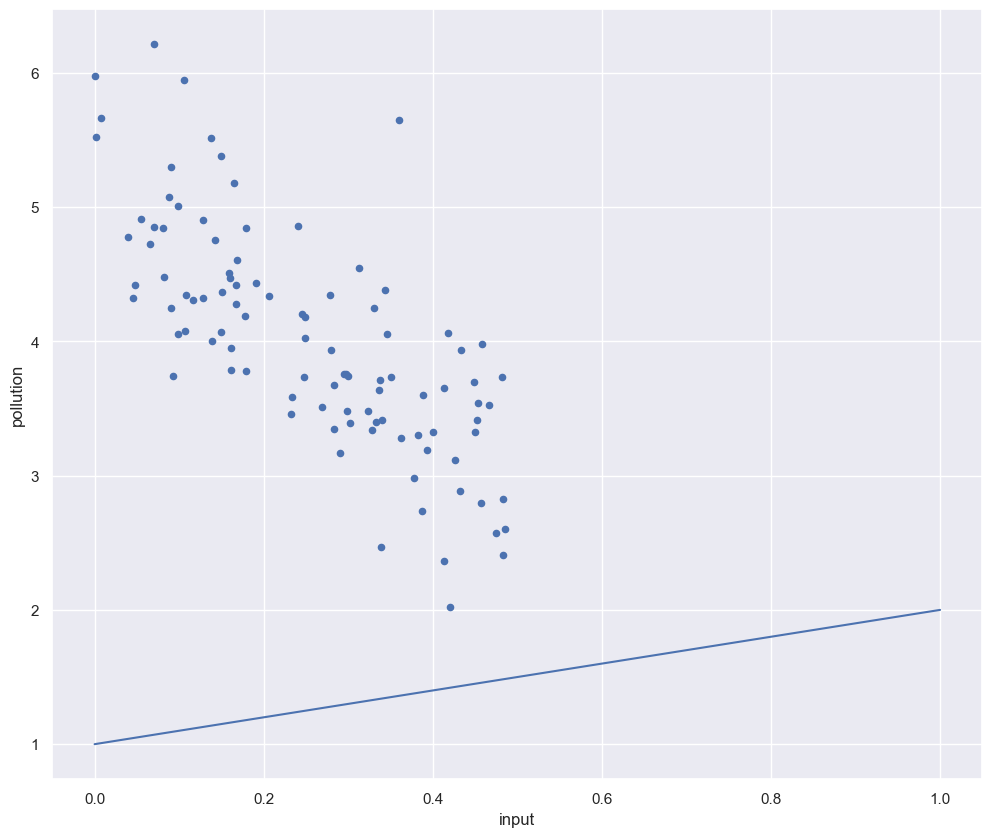

In [31]:
w, b = 1, 1
x0, x1 = 0.0, 1.0
def h(x,w,b):
    return w*x+b

#데이터(산포도)와 가설 (직선)을 비교
lin_data.plot(kind= 'scatter', x = 'input', y = 'pollution')
plt.plot([x0,x1], [h(x0,w,b), h(x1,w,b)])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


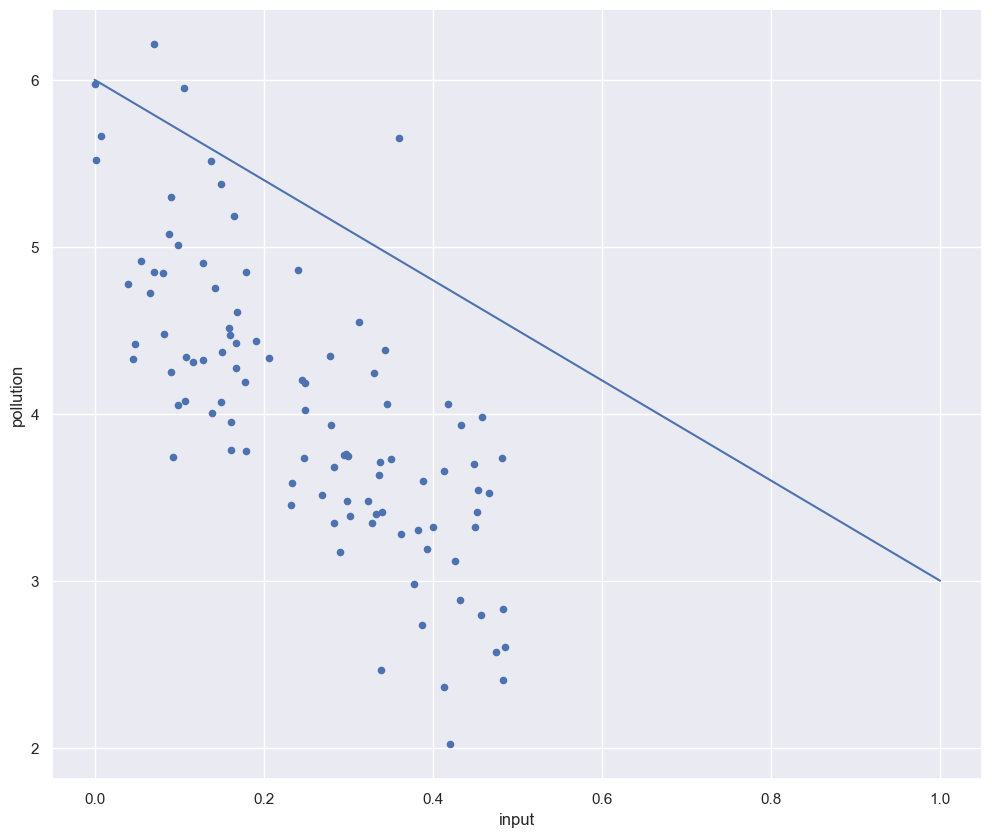

In [32]:
w, b = -3, 6
x0, x1 = 0.0, 1.0

#새로운 파라미터로 가설(직선)과 데이터(산포도) 비교
lin_data.plot(kind= 'scatter', x = 'input', y = 'pollution')
plt.plot([x0,x1], [h(x0,w,b), h(x1,w,b)])

In [33]:
import numpy as np
from sklearn.metrics import mean_squared_error as mse

#5개 점의 x, y 좌표값
x=np.array([1, 4.5, 9, 10, 13])
y=np.array([0, 0.2, 2.5, 5.4, 7.3])

w_list = np.arange(1.0, 0.2, -0.1)
for w in list(w_list):
    y_hat = w*x
    print('w = {:.1f}, 평균제곱 오차 : {:.2f}'.format(w, mse(y_hat, y)))

w = 1.0, 평균제곱 오차 : 23.08
w = 0.9, 평균제곱 오차 : 15.86
w = 0.8, 평균제곱 오차 : 10.13
w = 0.7, 평균제곱 오차 : 5.89
w = 0.6, 평균제곱 오차 : 3.13
w = 0.5, 평균제곱 오차 : 1.85
w = 0.4, 평균제곱 오차 : 2.06
w = 0.3, 평균제곱 오차 : 3.75


ws = [1.  0.9 0.8 0.7 0.6 0.5 0.4 0.3 0.2 0.1]
ys: [23.077999999999996, 15.8625, 10.132000000000001, 5.886500000000003, 3.1260000000000012, 1.8505000000000003, 2.0599999999999987, 3.7544999999999957, 6.933999999999993, 11.59849999999999] min 0.1000000000000002


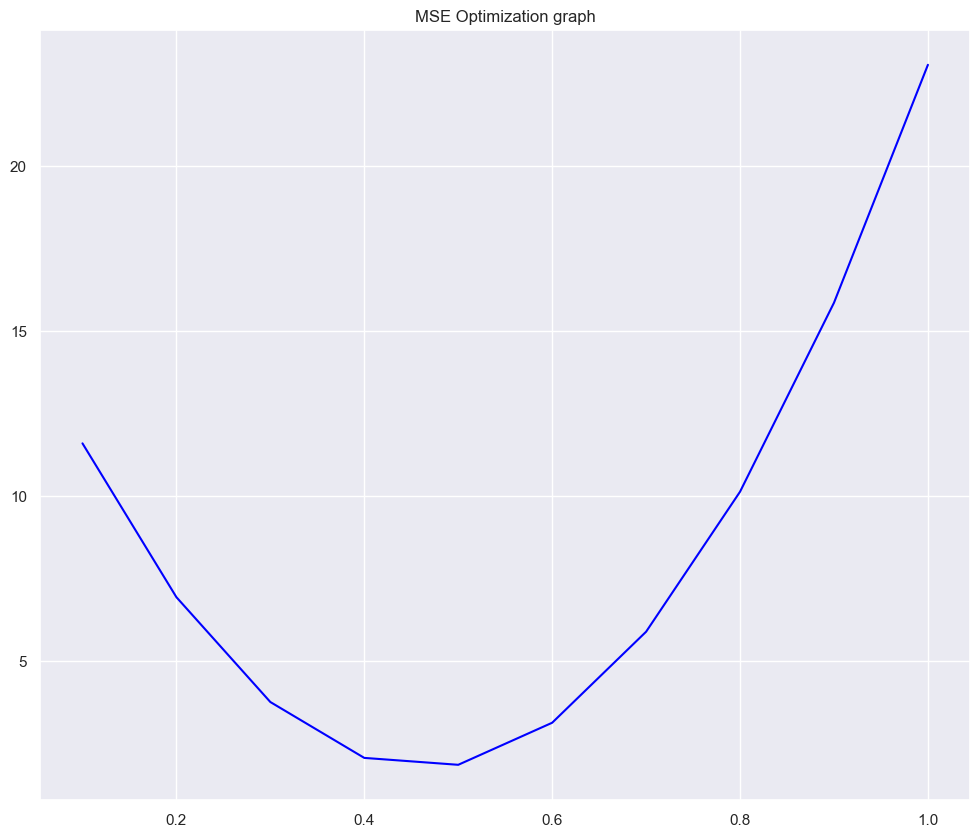

In [34]:
#https://matplotlib.org/stable/tutorials/introductory/quick_start.html
%matplotlib inline 
ws = np.arange(1.0, 0.0, -0.1)
ys = []
print('ws =', ws)
for i in list(ws):
    y_hat = i*x
    ys.append(mse(y_hat, y)) # 포물선 그리기
print('ys:', ys, 'min', np.min(ws))
plt.title('MSE Optimization graph')
plt.plot(ws, ys, c = 'blue')

In [35]:
w,b = -3, 6 #w,b가 -3 6일 때 h()함수를 y^hat 함수로 지정
x = lin_data['input'].to_numpy()
y = lin_data['pollution'].to_numpy()
y_pred = h(x, w, b)
error = (y_pred - y)
error

array([ 0.4195784 ,  1.04971677,  1.33321941,  1.71184524,  1.47205094,
        1.29651981,  0.90796599,  1.60479092,  0.43274803,  1.34273875,
        1.04704019,  0.17173389,  1.62983969,  2.71606203,  0.76239547,
        0.81910416,  1.68277334,  1.84517464,  1.83123493,  1.05999343,
        1.54915161,  1.62613855,  1.35757149,  0.9559527 ,  0.69384839,
        1.43756403,  1.00967404,  0.68616603,  1.73449862,  1.23144237,
        2.00034361,  1.34951392,  0.32087407, -0.2647334 ,  1.97698033,
        1.18131751,  1.72325619,  1.80163473, -0.42384495,  1.27631632,
        1.07877757,  0.64225129,  1.22905797,  1.07590731,  1.55013999,
        0.76691574,  1.67240252,  1.10559534,  1.27540987, -0.73003295,
        1.27263587,  1.63061935,  1.35614568,  1.58218579,  2.39535838,
        1.48261159,  1.524646  ,  1.60174464,  0.47302039,  1.09862732,
        1.22260149,  1.56899704,  0.02277376,  2.1449076 ,  1.47727095,
        1.8862379 ,  1.21790966,  2.51660705,  1.23173843,  0.61

In [36]:
learning_rate = 0.005
w = w - learning_rate * (error * x).sum()
b = b - learning_rate * error.sum()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


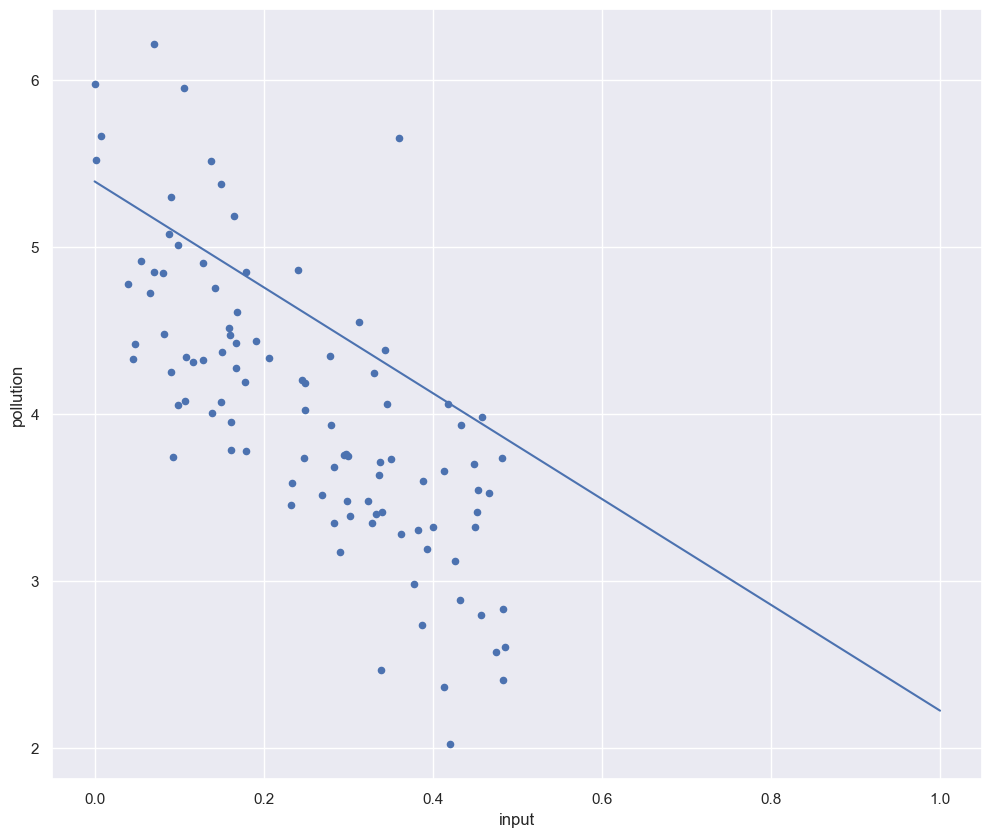

In [37]:
lin_data.plot(kind = 'scatter', x = 'input', y = 'pollution')
plt.plot([x0, x1], [h(x0, w, b), h(x1, w, b)])

w = 1.0, 평균제곱 오차 : 15.08
w = 0.9, 평균제곱 오차 : 15.25
w = 0.8, 평균제곱 오차 : 15.43
w = 0.7, 평균제곱 오차 : 15.60
w = 0.6, 평균제곱 오차 : 15.78
w = 0.5, 평균제곱 오차 : 15.95
w = 0.4, 평균제곱 오차 : 16.13
w = 0.3, 평균제곱 오차 : 16.31
ws = [1.  0.9 0.8 0.7 0.6 0.5 0.4 0.3 0.2 0.1]
ys: [3.543047249183155, 3.4399143747729113, 3.338458709207736, 3.23868025248763, 3.1405790046125954, 3.044154965582631, 2.949408135397736, 2.8563385140579114, 2.7649461015631562, 2.67523089791347] min 0.1000000000000002


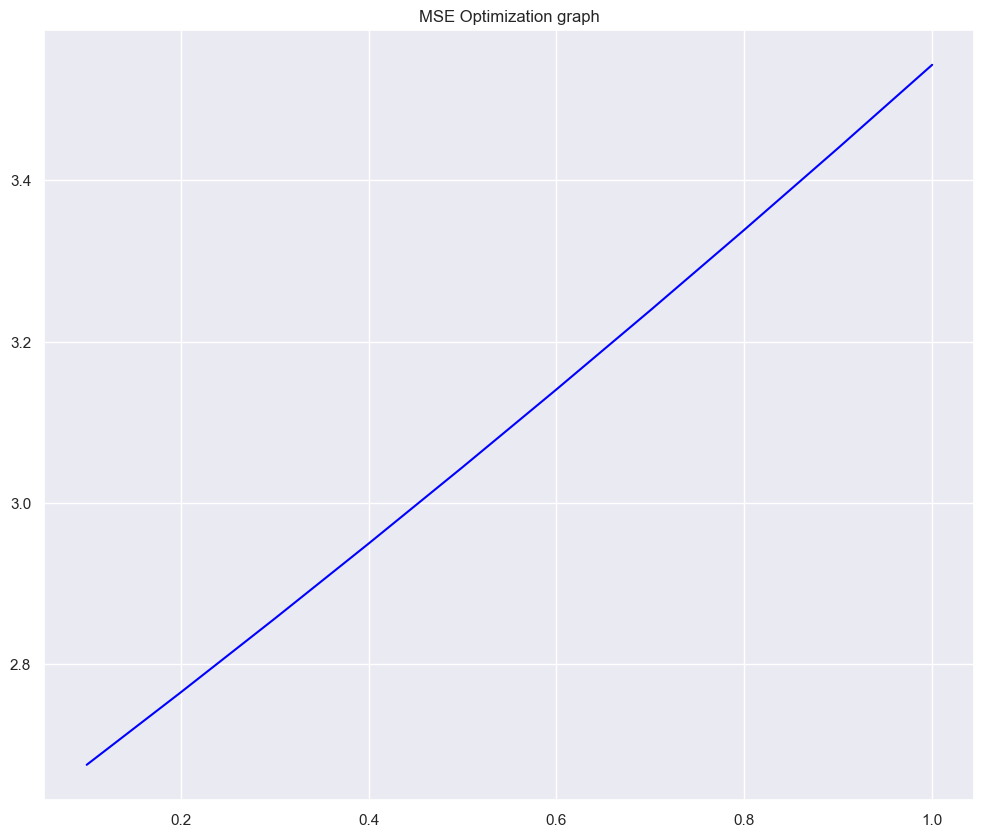

In [38]:
#이거 아직 완성못함 ㅜㅜ
w_list = np.arange(1.0, 0.2, -0.1)
for w in list(w_list):
    y_hat = w*x
    print('w = {:.1f}, 평균제곱 오차 : {:.2f}'.format(w, mse(y_hat, y)))

#https://matplotlib.org/stable/tutorials/introductory/quick_start.html
%matplotlib inline 
ws2 = np.arange(1.0, 0.0, -0.1)
ys = []
print('ws =', ws)
for i in list(ws):
    y_hat = i*x + b
    ys.append(mse(y_hat, y)) # 포물선 그리기
print('ys:', ys, 'min', np.min(ws))
plt.title('MSE Optimization graph')
plt.plot(ws, ys, c = 'blue')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

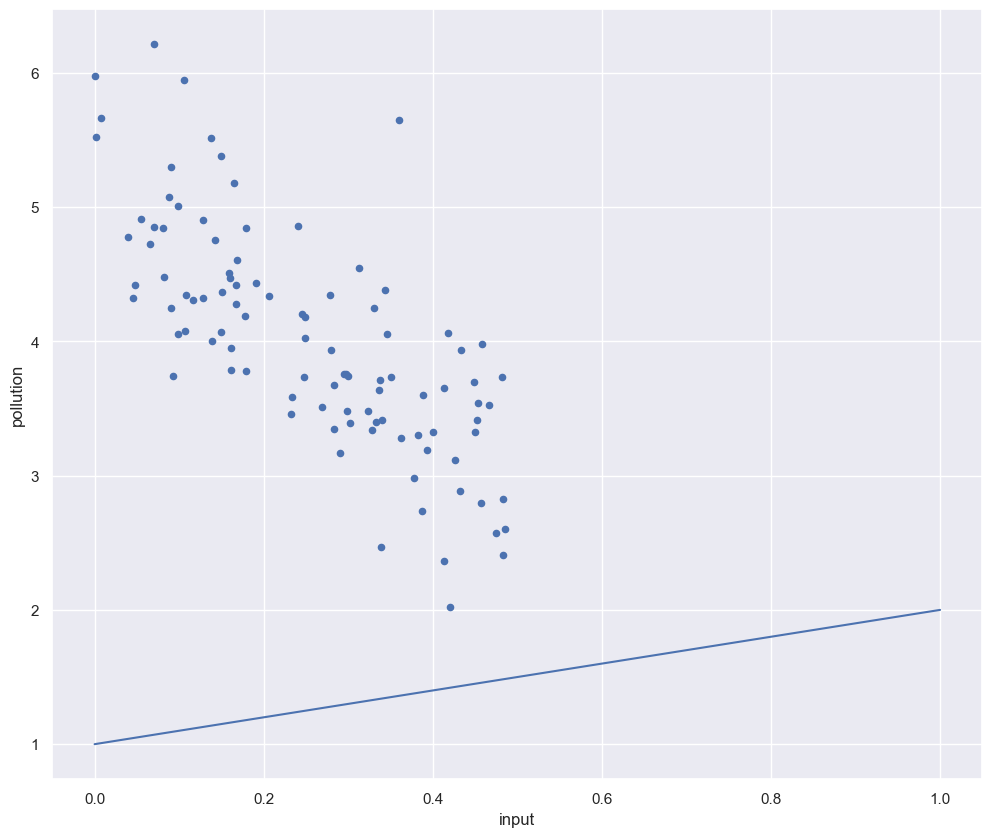

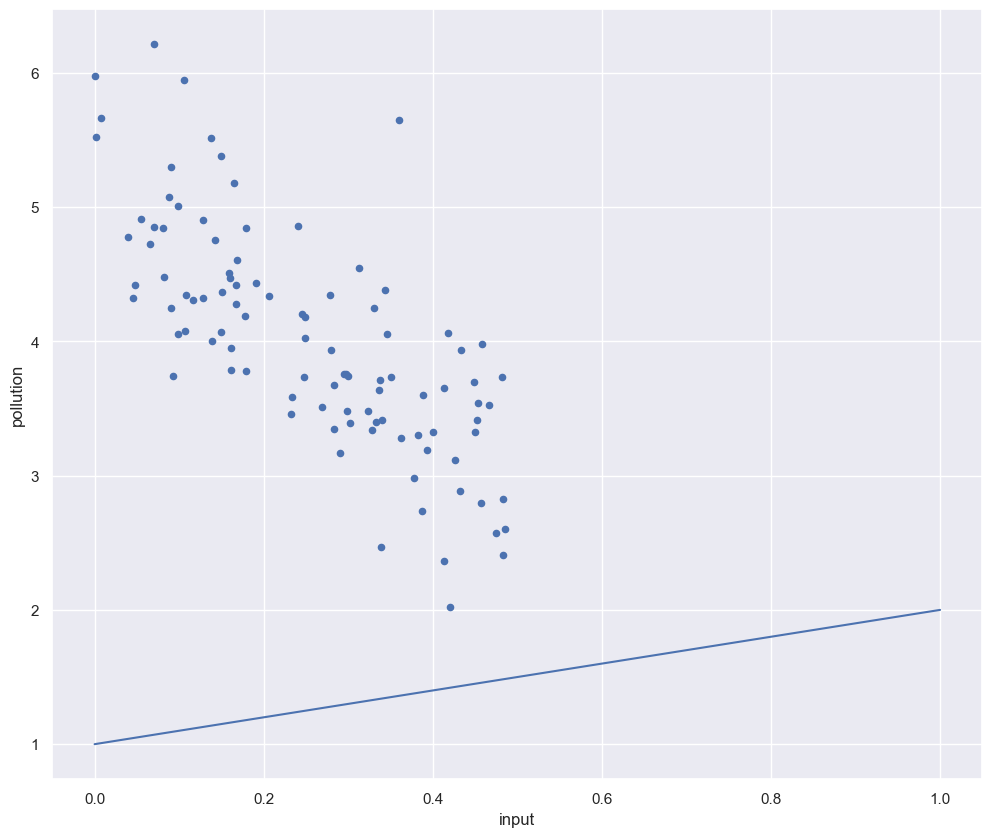

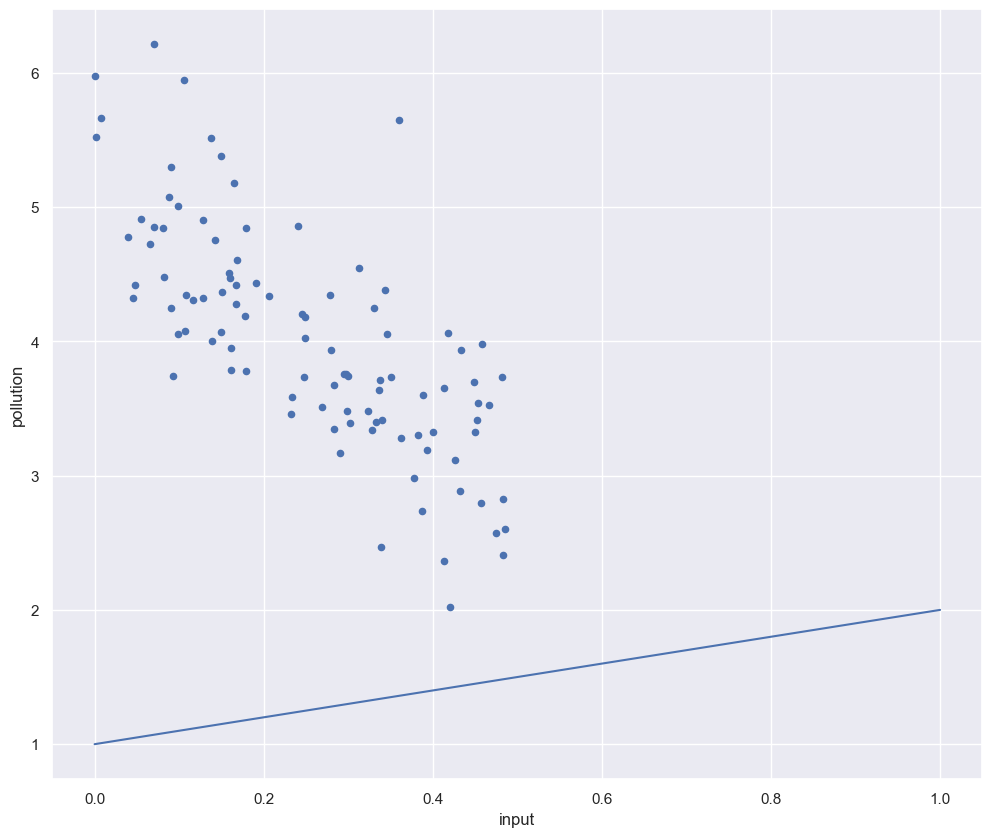

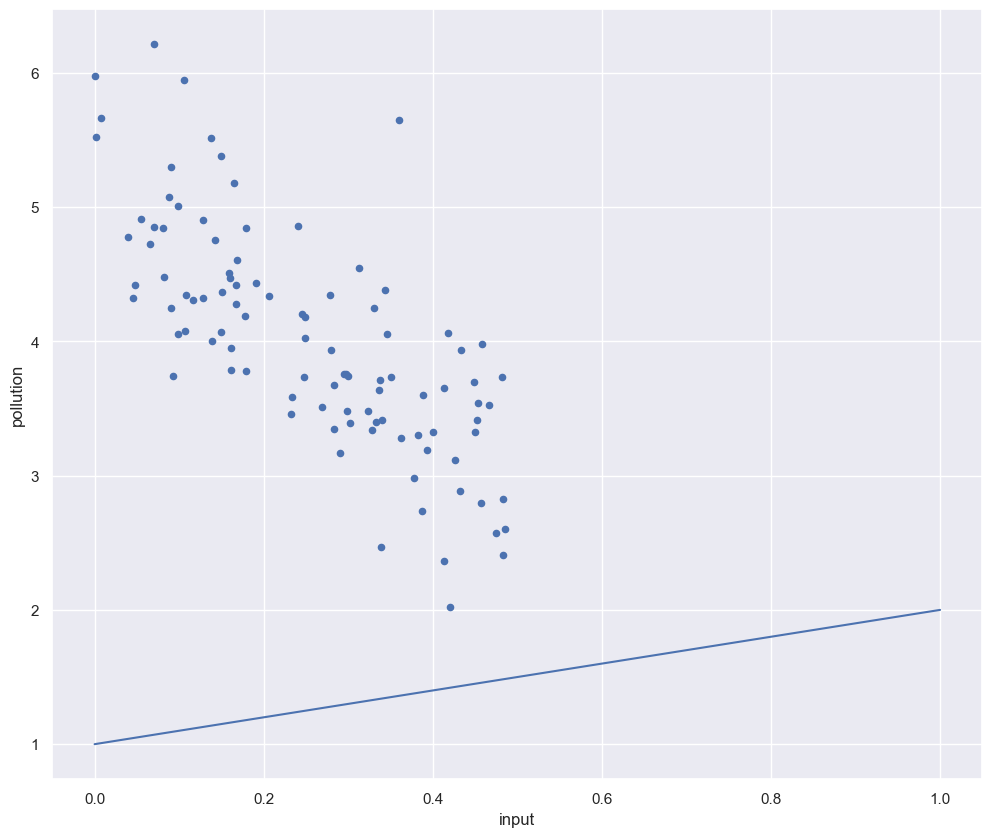

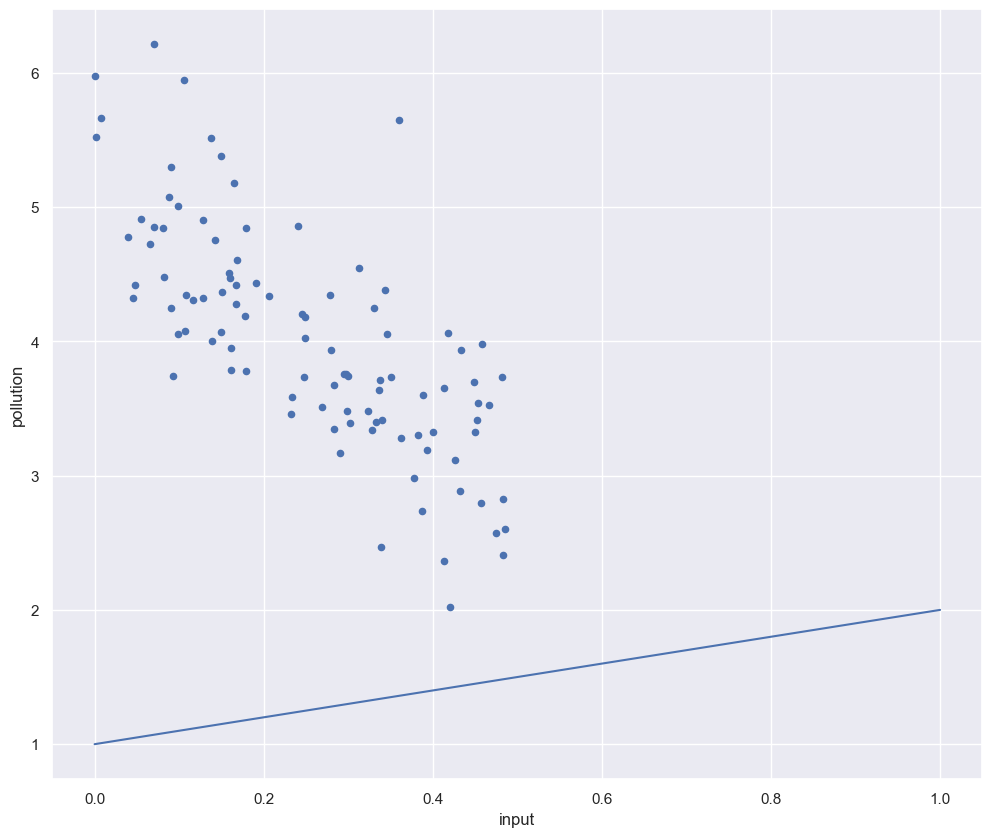

In [39]:
#week6
def h(x, param):
    return param[0]*x + param[1]

learning_iteration = 1000 #하이퍼파라미터 : 학습 반복 횟수
learning_rate = 0.001  #하이퍼 파라미터 : 학습율로 0.05, 0.001 등이 가능

param = [1,1] # w, b를 하나의 변수로 함

x = lin_data['input'].to_numpy()
y = lin_data['pollution'].to_numpy()

for i in range(learning_iteration):
    if i % 200 == 0:
        lin_data.plot(kind = 'scatter', x = 'input', y = 'pollution')
        plt.plot([0, 1], [h(0,param), h(1, param)])

error = (h(x, param) - y)
param[0] -= learning_rate * (error*x).sum()
param[1] -= learning_rate * error.sum()

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model #sciket-learn 모듈 로드

data_home = 'https://github.com/dknife/ML/raw/main/data/'
lin_data = pd.read_csv(data_home+'pollution.csv')

In [41]:
x = lin_data['input'].to_numpy()
y = lin_data['pollution'].to_numpy()
x = x[:, np.newaxis]
print(x)

[[0.24055707]
 [0.1597306 ]
 [0.10829455]
 [0.23377033]
 [0.28323537]
 [0.12808583]
 [0.34549075]
 [0.33271329]
 [0.09001426]
 [0.11620483]
 [0.20601359]
 [0.15000132]
 [0.39294774]
 [0.4209191 ]
 [0.33071579]
 [0.48175618]
 [0.26858081]
 [0.2328081 ]
 [0.45704999]
 [0.24569785]
 [0.38236759]
 [0.29856761]
 [0.29944705]
 [0.44841195]
 [0.09896587]
 [0.04793845]
 [0.15920226]
 [0.41791947]
 [0.16082931]
 [0.24851334]
 [0.47514699]
 [0.29708178]
 [0.1653657 ]
 [0.10529827]
 [0.0932346 ]
 [0.15023707]
 [0.48271145]
 [0.28364396]
 [0.07020281]
 [0.17768318]
 [0.46604517]
 [0.45860857]
 [0.27905958]
 [0.16777949]
 [0.32352937]
 [0.4329887 ]
 [0.32825247]
 [0.03894147]
 [0.33719318]
 [0.36048117]
 [0.08236935]
 [0.36232547]
 [0.33608776]
 [0.13852276]
 [0.41330502]
 [0.14950648]
 [0.24760616]
 [0.10715455]
 [0.00153907]
 [0.45324442]
 [0.16725705]
 [0.16088719]
 [0.00066376]
 [0.48323703]
 [0.0902836 ]
 [0.3775714 ]
 [0.3501837 ]
 [0.33927998]
 [0.45179427]
 [0.17890406]
 [0.16829187]
 [0.24

In [42]:
regr = linear_model.LinearRegression()
regr.fit(x, y) #선형 회귀 모델에 데이터를 넣어 학습을 진행

LinearRegression()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


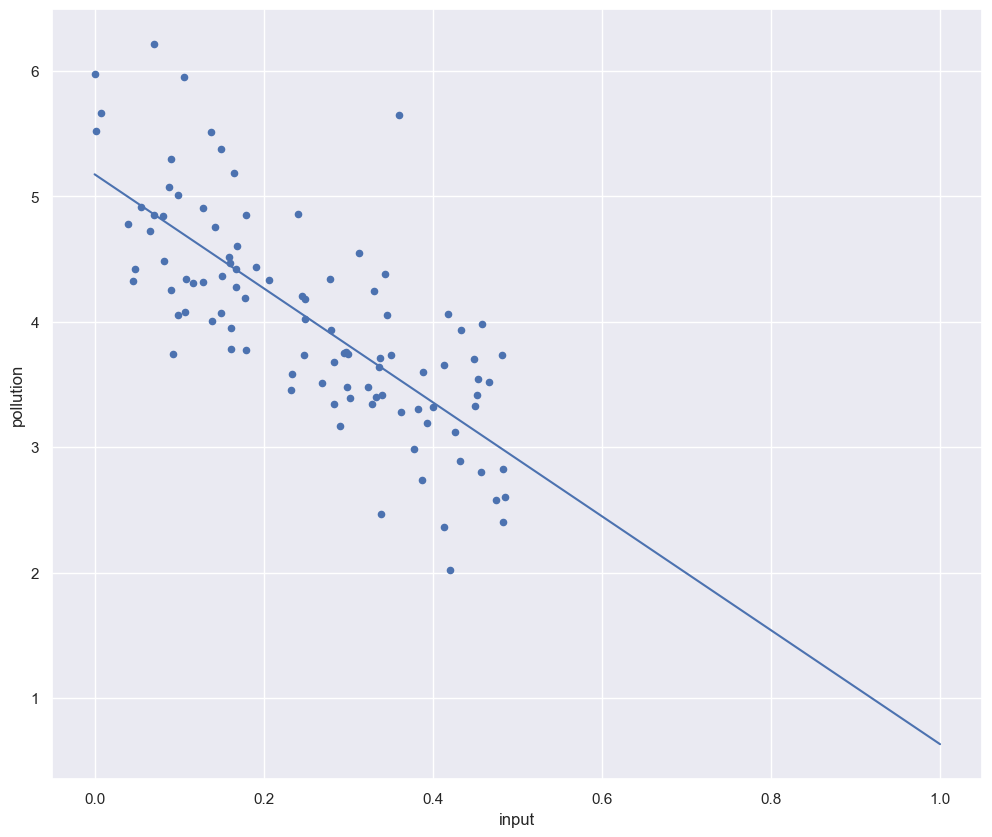

In [43]:
lin_data.plot(kind = 'scatter', x= 'input', y = 'pollution')
y_pred = regr.predict([[0], [1]])
plt.plot([0, 1], y_pred)

In [44]:
data_home = 'https://github.com/dknife/ML/raw/main/data/'
lin_data = pd.read_csv(data_home+'pollution.csv')
x = lin_data['input'].to_numpy()
y = lin_data['pollution'].to_numpy()
x = x[:, np.newaxis]
X = np.c_[np.ones((100, 1)), x]
print(x)

[[0.24055707]
 [0.1597306 ]
 [0.10829455]
 [0.23377033]
 [0.28323537]
 [0.12808583]
 [0.34549075]
 [0.33271329]
 [0.09001426]
 [0.11620483]
 [0.20601359]
 [0.15000132]
 [0.39294774]
 [0.4209191 ]
 [0.33071579]
 [0.48175618]
 [0.26858081]
 [0.2328081 ]
 [0.45704999]
 [0.24569785]
 [0.38236759]
 [0.29856761]
 [0.29944705]
 [0.44841195]
 [0.09896587]
 [0.04793845]
 [0.15920226]
 [0.41791947]
 [0.16082931]
 [0.24851334]
 [0.47514699]
 [0.29708178]
 [0.1653657 ]
 [0.10529827]
 [0.0932346 ]
 [0.15023707]
 [0.48271145]
 [0.28364396]
 [0.07020281]
 [0.17768318]
 [0.46604517]
 [0.45860857]
 [0.27905958]
 [0.16777949]
 [0.32352937]
 [0.4329887 ]
 [0.32825247]
 [0.03894147]
 [0.33719318]
 [0.36048117]
 [0.08236935]
 [0.36232547]
 [0.33608776]
 [0.13852276]
 [0.41330502]
 [0.14950648]
 [0.24760616]
 [0.10715455]
 [0.00153907]
 [0.45324442]
 [0.16725705]
 [0.16088719]
 [0.00066376]
 [0.48323703]
 [0.0902836 ]
 [0.3775714 ]
 [0.3501837 ]
 [0.33927998]
 [0.45179427]
 [0.17890406]
 [0.16829187]
 [0.24

In [45]:
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
theta

array([ 5.17550358, -4.54449866])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


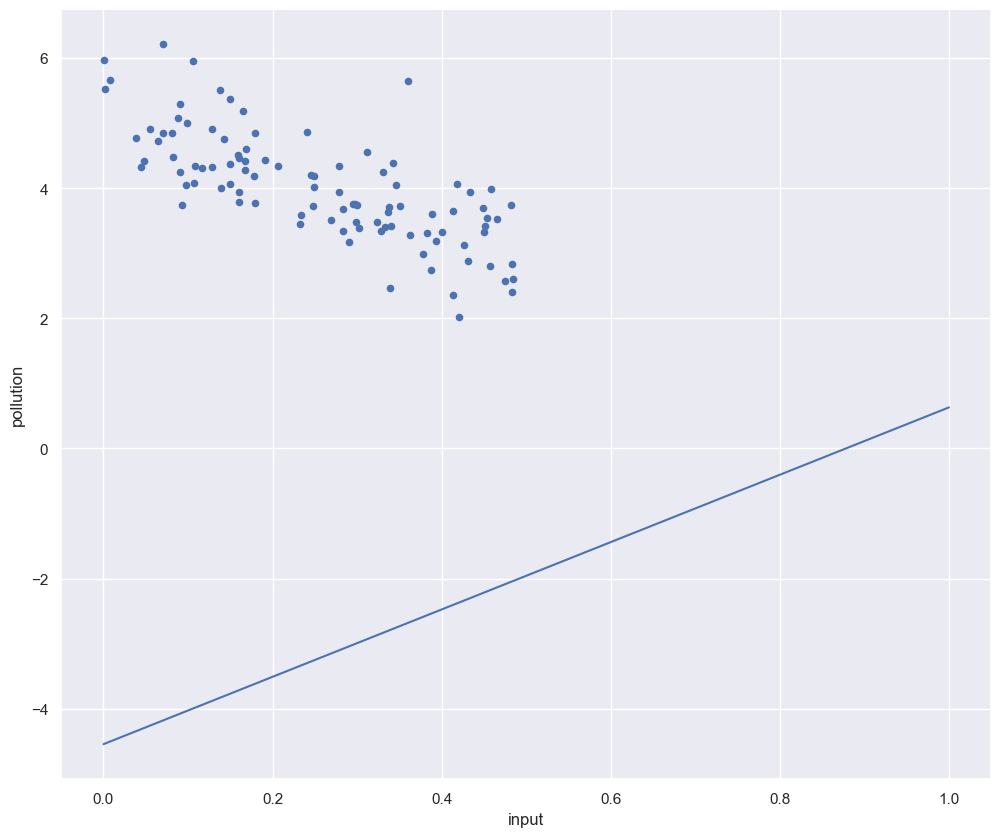

In [46]:
def g(x, theta):
    return x*theta[1] + theta[0]

#데이터와 가설을 비교
lin_data.plot(kind = 'scatter', x = 'input', y = 'pollution') #데이터
plt.plot([0,1], [h(0, theta), h(1, theta)]) #가설

In [47]:
!pip install seaborn

In [48]:
#116p~121p까지 아직 못 타이핑함
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_loc = 'https://github.com/dknife/ML/raw/main/data/'
life = pd.read_csv(data_loc + 'life_expectancy.csv')
life.head()

,Country,Year,Status,Life expectancy,Adult mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [49]:
life = life[['Life expectancy', 'Year', 'Alcohol', 'Percentage expenditure', 'Total expenditure', 
             'Hepatitis B', 'Measles', 'Polio', 'BMI', 'GDP', 'Thinness 1-19 years','Thinness 5-9 years']]
print(life)

      Life expectancy  Year  Alcohol  Percentage expenditure  \
0                65.0  2015     0.01               71.279624   
1                59.9  2014     0.01               73.523582   
2                59.9  2013     0.01               73.219243   
3                59.5  2012     0.01               78.184215   
4                59.2  2011     0.01                7.097109   
...               ...   ...      ...                     ...   
2933             44.3  2004     4.36                0.000000   
2934             44.5  2003     4.06                0.000000   
2935             44.8  2002     4.43                0.000000   
2936             45.3  2001     1.72                0.000000   
2937             46.0  2000     1.68                0.000000   

      Total expenditure  Hepatitis B  Measles  Polio   BMI         GDP  \
0                  8.16         65.0     1154    6.0  19.1  584.259210   
1                  8.18         62.0      492   58.0  18.6  612.696514   
2        

In [50]:
print(life.shape)
print(life.isnull().sum()) #결손값 존재하는 factors 확인

(2938, 12)
Life expectancy            10
Year                        0
Alcohol                   194
Percentage expenditure      0
Total expenditure         226
Hepatitis B               553
Measles                     0
Polio                      19
BMI                        34
GDP                       448
Thinness 1-19 years        34
Thinness 5-9 years         34
dtype: int64


In [51]:
life.dropna(inplace = True)
print(life.shape)

(1853, 12)


<function matplotlib.pyplot.show(close=None, block=None)>

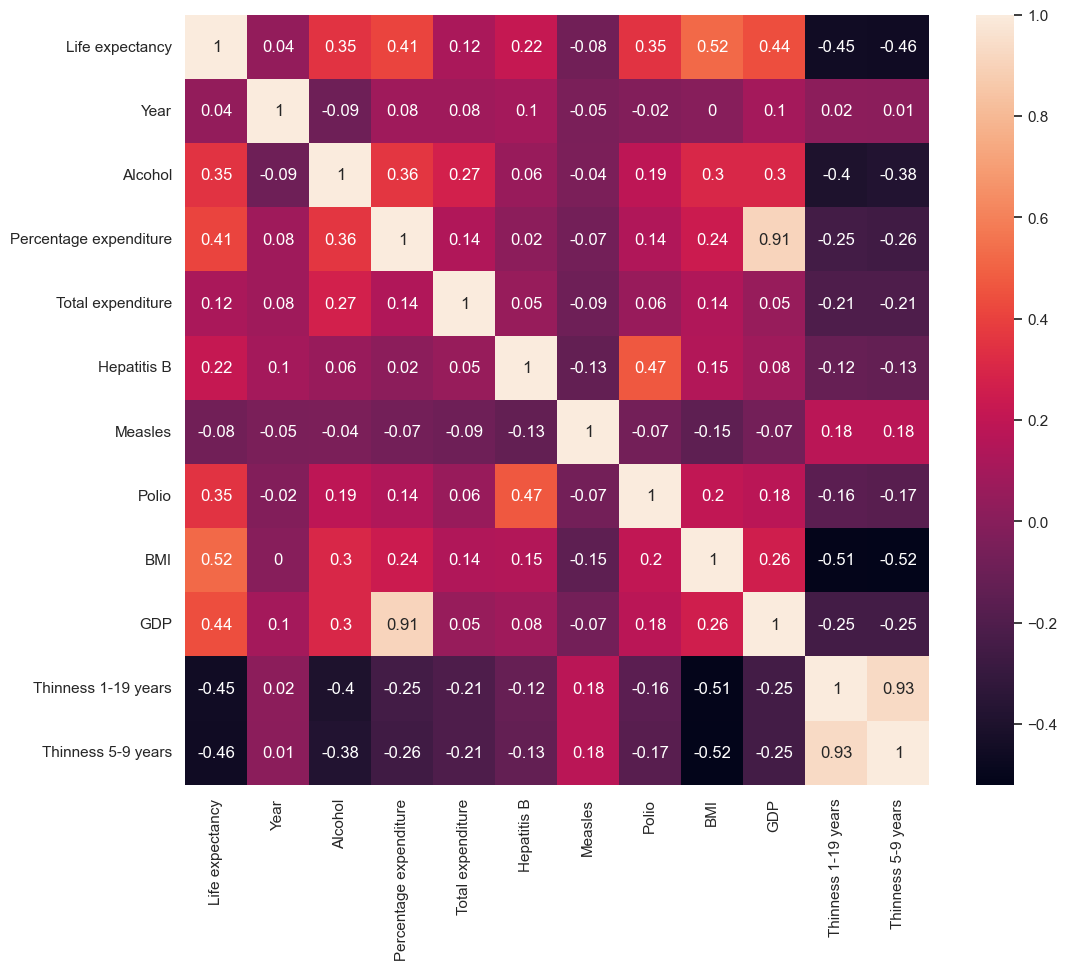

In [52]:
sns.set(rc={'figure.figsize':(12,10)}) #상관행렬 가시
correlation_matrix = life.corr().round(2) #상관행렬 생성
sns.heatmap(data=correlation_matrix, annot=True)
plt.show

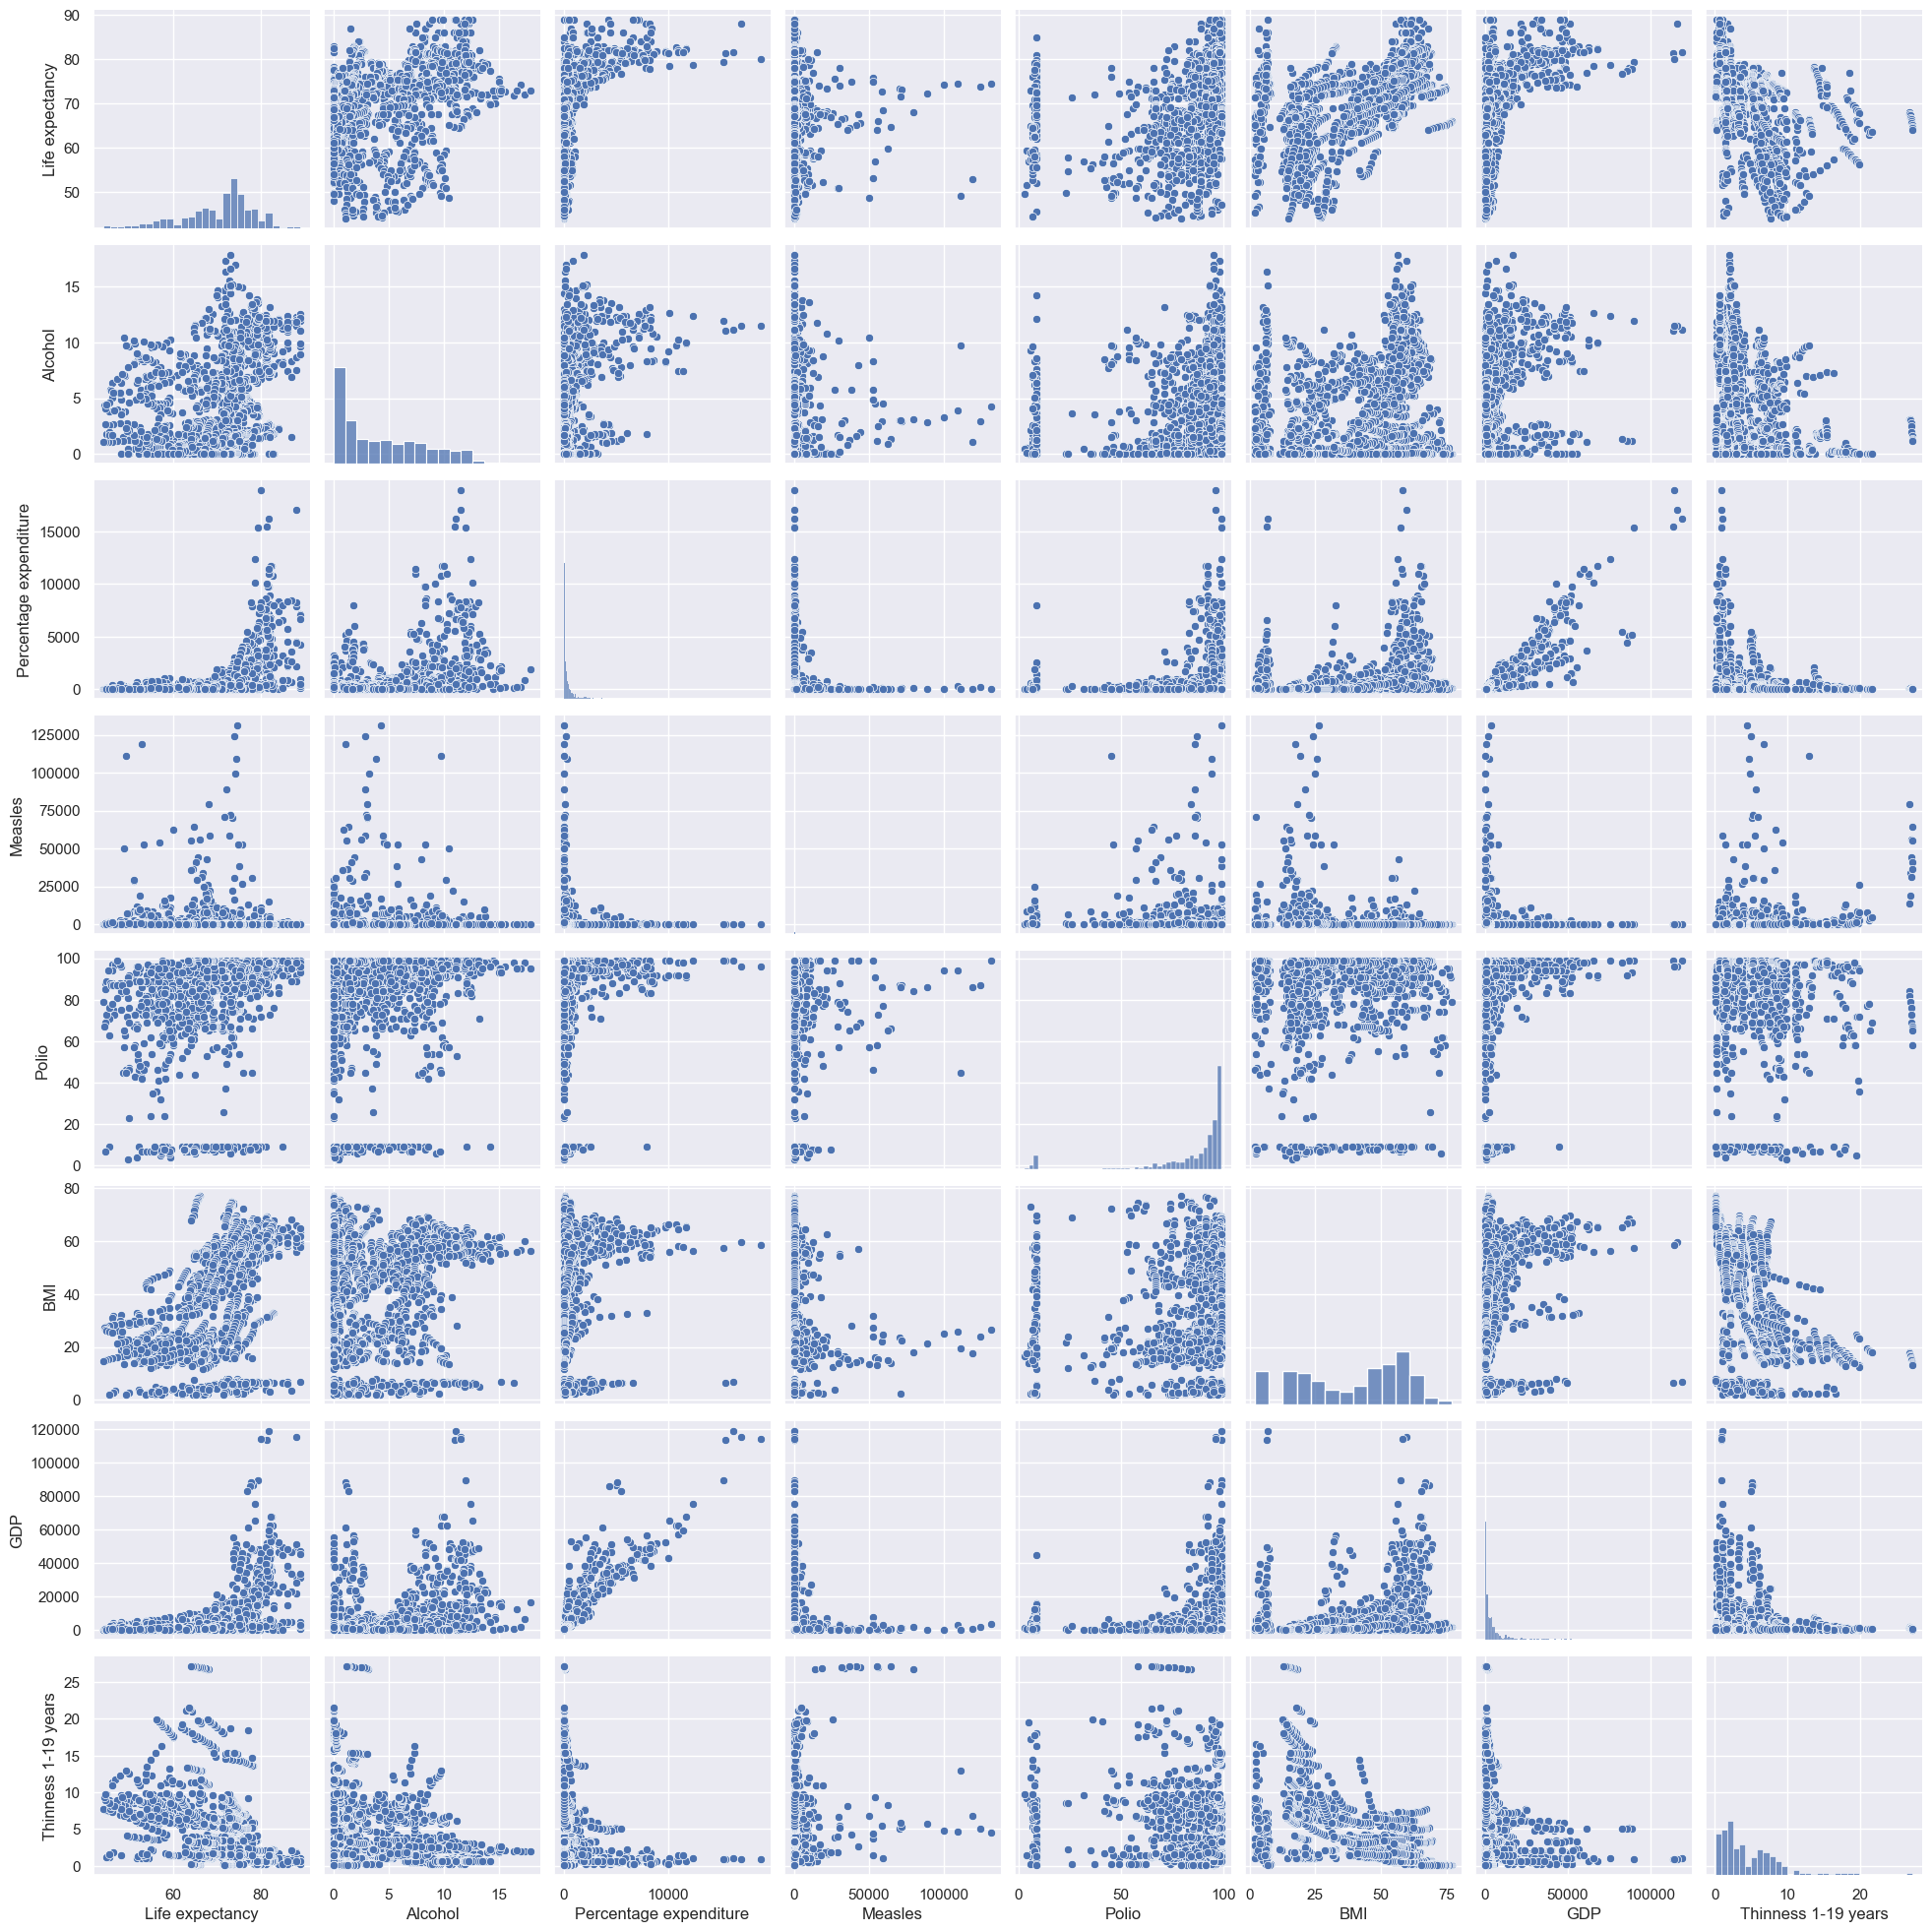

In [53]:
sns.pairplot(life[['Life expectancy', 'Alcohol', 'Percentage expenditure','Measles', 'Polio', 'BMI', 'GDP', 'Thinness 1-19 years']])
plt.show()

In [54]:
X = life[['Life expectancy', 'Alcohol', 'Percentage expenditure','Measles', 'Polio', 'BMI', 'GDP', 'Thinness 1-19 years']]
y = life['Life expectancy']
print(x)
print(y)

[[0.24055707]
 [0.1597306 ]
 [0.10829455]
 [0.23377033]
 [0.28323537]
 [0.12808583]
 [0.34549075]
 [0.33271329]
 [0.09001426]
 [0.11620483]
 [0.20601359]
 [0.15000132]
 [0.39294774]
 [0.4209191 ]
 [0.33071579]
 [0.48175618]
 [0.26858081]
 [0.2328081 ]
 [0.45704999]
 [0.24569785]
 [0.38236759]
 [0.29856761]
 [0.29944705]
 [0.44841195]
 [0.09896587]
 [0.04793845]
 [0.15920226]
 [0.41791947]
 [0.16082931]
 [0.24851334]
 [0.47514699]
 [0.29708178]
 [0.1653657 ]
 [0.10529827]
 [0.0932346 ]
 [0.15023707]
 [0.48271145]
 [0.28364396]
 [0.07020281]
 [0.17768318]
 [0.46604517]
 [0.45860857]
 [0.27905958]
 [0.16777949]
 [0.32352937]
 [0.4329887 ]
 [0.32825247]
 [0.03894147]
 [0.33719318]
 [0.36048117]
 [0.08236935]
 [0.36232547]
 [0.33608776]
 [0.13852276]
 [0.41330502]
 [0.14950648]
 [0.24760616]
 [0.10715455]
 [0.00153907]
 [0.45324442]
 [0.16725705]
 [0.16088719]
 [0.00066376]
 [0.48323703]
 [0.0902836 ]
 [0.3775714 ]
 [0.3501837 ]
 [0.33927998]
 [0.45179427]
 [0.17890406]
 [0.16829187]
 [0.24

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [56]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

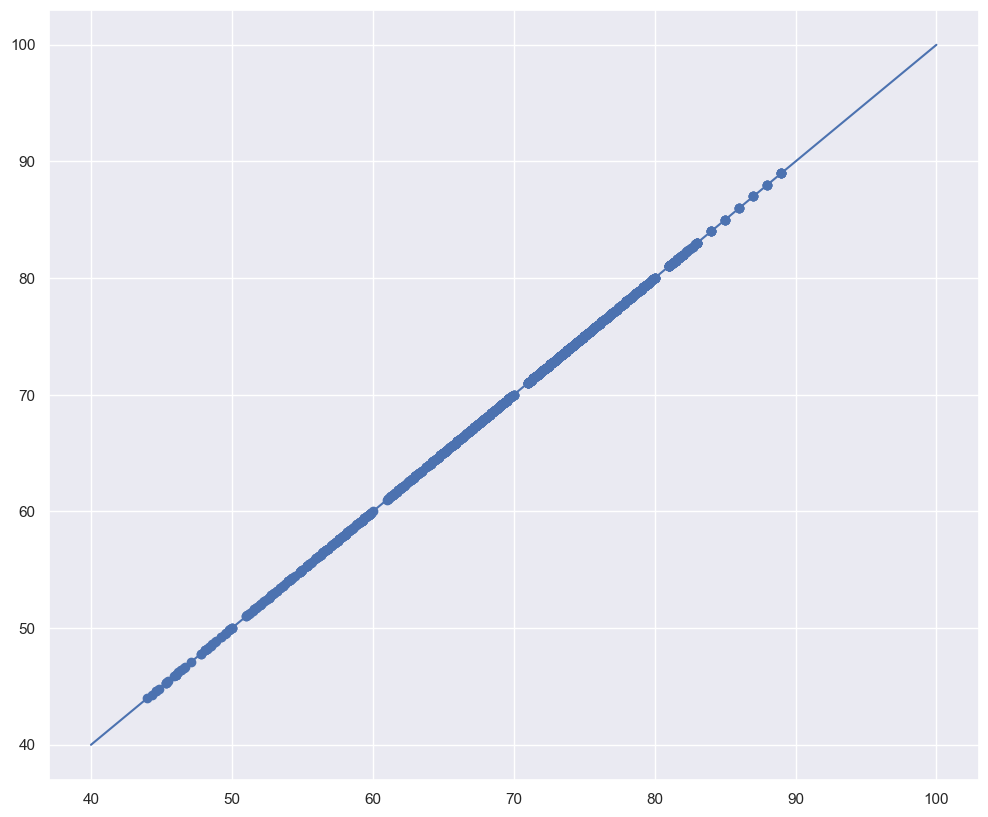

In [58]:
y_hat_train = lin_model.predict(X_train)
plt.scatter(y_train, y_hat_train)
xy_range = [40, 100]
plt.plot(xy_range, xy_range)

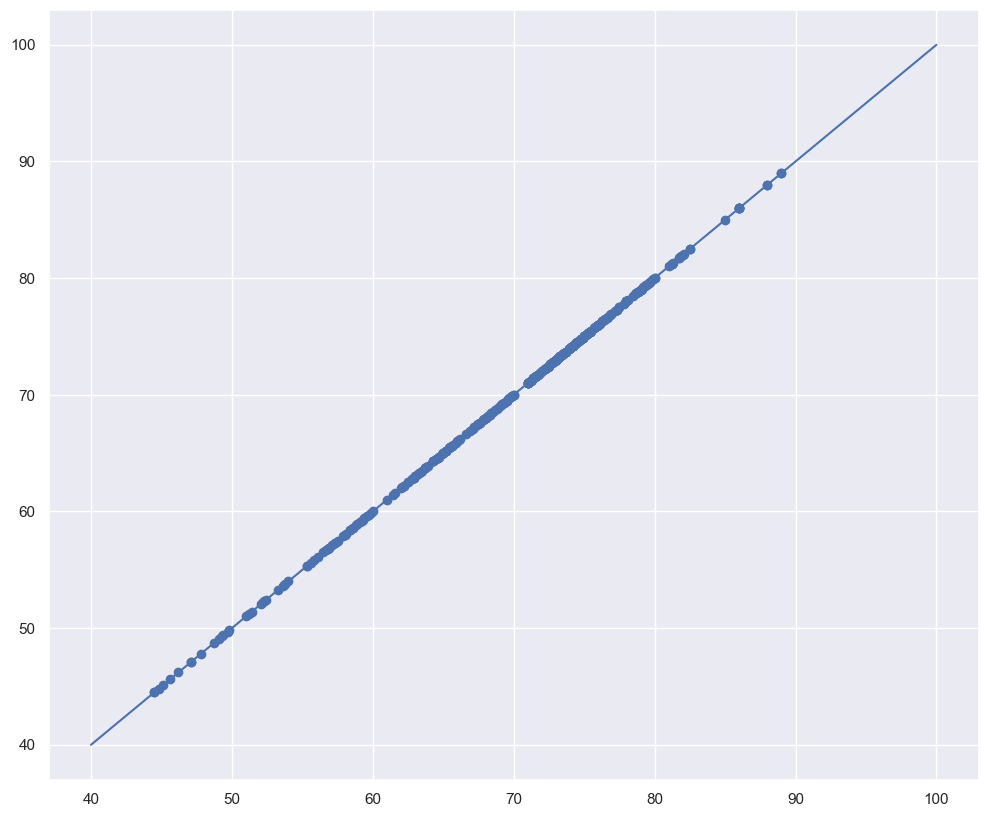

In [60]:
y_hat_test = lin_model.predict(X_test)
plt.scatter(y_test, y_hat_test) # 검증 데이터와 예측 데이터의 산포도
plt.plot(xy_range, xy_range) #(40,40)--------->(10,100)으로 직선 / 데이터가 이 직선과 일치할수록 예측이 정확

In [62]:
from sklearn.preprocessing import normalize

n_X = normalize(X, axis = 0)

In [65]:
nXtrain, nXtest, y_train, y_test = train_test_split(n_X, y, test_size = 0.2)
lin_model.fit(nXtrain, y_train)

LinearRegression()

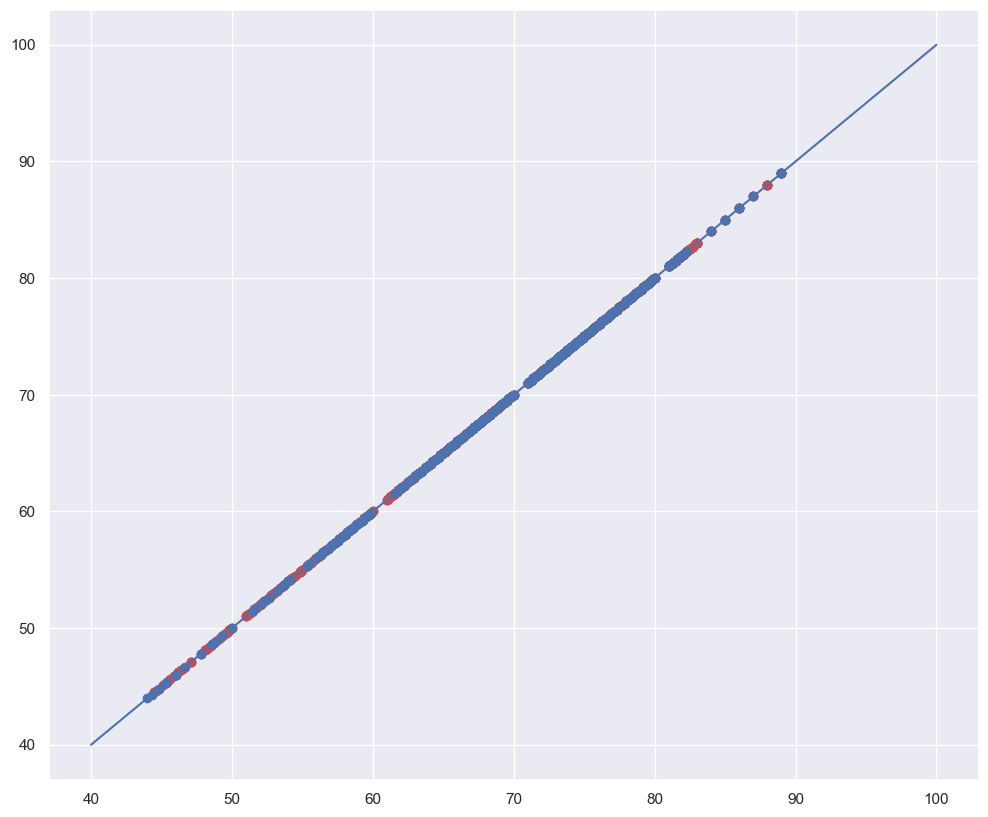

In [66]:
y_hat_train = lin_model.predict(nXtrain)
y_hat_test = lin_model.predict(nXtest)
plt.scatter(y_train, y_hat_train, color= 'r')
plt.scatter(y_test, y_hat_test, color = 'b')
plt.plot(xy_range, xy_range)

In [71]:
from sklearn.metrics import mean_squared_error
print('Test(20%) Mean Squared Error:', mean_squared_error(y_test, y_hat_test))
print('Train Mean(80%) Squared Error:', mean_squared_error(y_train, y_hat_train))

Test(20%) Mean Squared Error: 7.279123634763889e-28
Train Mean(80%) Squared Error: 7.193219115246063e-28


In [ ]:
#exercise 4.1 한 번 풀어보기나 해보자 !!!
import pandas as pd from sklearn.linear_model import LinearRegression